# Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Load in the data

In [ ]:
# Reading data from a particular url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
print(data.head())

Data imported successfully
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


# Plotting the data 

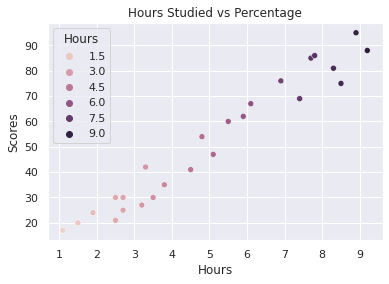

In [ ]:
# Plotting the distribution of scores

# Apply the default theme
sns.set_theme()
plt.title('Hours Studied vs Percentage')
sns.scatterplot(data=data, x="Hours", y="Scores",hue='Hours')
plt.show()

#### We clearly see that their is a positive linear relation between the number of hours studied and percentage achived.

# Data Preperation

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [ ]:
# Split the data into train and test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=420) 

reg = LinearRegression(normalize=True).fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print("Training is Completed!")

Training is Completed!


# Plotting the linear regression line

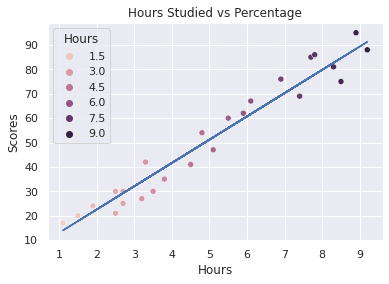

In [ ]:
# Plotting the distribution of scores
line = reg.coef_*X+reg.intercept_

# Apply the default theme
sns.set_theme()
plt.title('Hours Studied vs Percentage')
sns.scatterplot(data=data, x="Hours", y="Scores",hue='Hours')
plt.plot(X,line)
plt.show()

In [ ]:
print("Testing data in hours")
print(X_test)

Testing data in hours
[[4.8]
 [5.1]
 [3.2]
 [5.5]
 [7.8]]


In [ ]:
y_pred = reg.predict(X_test) # Predicting the scores for the test data

# Comparing Actual vs Predicted

In [ ]:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df) 

   Actual  Predicted
0      54  49.266443
1      47  52.128975
2      27  33.999604
3      60  55.945685
4      86  77.891765


# Final test on our own data

In [ ]:
hours = 9.25
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 91.72733677285393


# Metrics for testing the model performance

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math
print("Coefficient of Determination (R2) :"+str(r2_score(y_test, y_pred)))
print("Mean Square Error :"+str(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error :"+str(mean_absolute_error(y_test, y_pred)))
print("Root Mean Square Error :"+str(math.sqrt(mean_squared_error(y_test, y_pred))))

Coefficient of Determination (R2) :0.9019575066666821
Mean Square Error :35.97767335359437
Mean Absolute Error :5.804937513021796
Root Mean Square Error :5.998139157571652
